###Setup Environment

In [1]:
Project_Root = '/gdrive/MyDrive/CV_Project/'

In [2]:
from google.colab import drive
drive.mount('/gdrive')
# CD into root of your homework2 part3 directory
%cd -q $Project_Root

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
!ls

CV_project.ipynb  Project_proposal.docx  train.py
idea.docx	  requirements.txt	 vqvae.py


In [4]:
!pip install -r requirements.txt --upgrade

### Visualize Data

In [10]:
!ls

CV_project.ipynb  idea.docx		 requirements.txt
data		  Project_proposal.docx  train.py
GetData.ipynb	  __pycache__		 vqvae.py


In [20]:
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [23]:
data_dir = './data'

In [30]:
BATCH_SIZE = 64
transform = torchvision.transforms.ToTensor()

mnist_trainset = datasets.MNIST(root=data_dir, train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
print(len(mnist_trainset))
mnist_testset = datasets.MNIST(root=data_dir, train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
print(len(mnist_testset))

60000
10000


In [25]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Labels:  tensor([6, 5, 3, 5, 7, 0, 7, 2, 3, 3, 0, 5, 4, 2, 0, 5, 4, 2, 6, 3, 4, 5, 1, 3,
        4, 7, 4, 7, 8, 3, 3, 3, 3, 1, 6, 6, 4, 7, 5, 9, 8, 8, 9, 9, 0, 7, 5, 9,
        9, 4, 1, 9, 9, 8, 4, 4, 2, 2, 2, 0, 5, 4, 5, 7])
Batch shape:  torch.Size([64, 1, 28, 28])


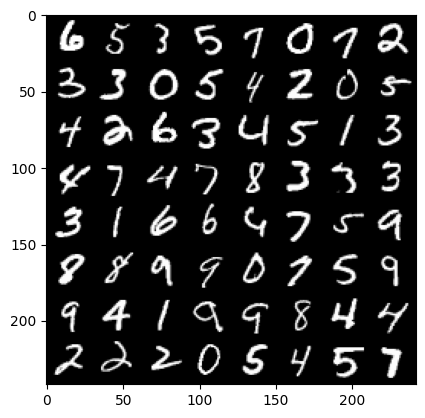

In [31]:
data_iter = iter(trainloader)
images, labels = next(data_iter)
print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

### Loading the model

In [32]:
from vqvae import VQVAE

In [33]:
# Initialize model.
device = torch.device("cpu")
use_ema = True
model_args = {
    "in_channels": 3,
    "num_hiddens": 128,
    "num_downsampling_layers": 2,
    "num_residual_layers": 2,
    "num_residual_hiddens": 32,
    "embedding_dim": 64,
    "num_embeddings": 512,
    "use_ema": use_ema,
    "decay": 0.99,
    "epsilon": 1e-5,
}
model = VQVAE(**model_args).to(device)